<h1>Covertype Data Set</h1>

Name: Jonathan Menahem <br>
ID: 203772611 <br>


<h2>Links:</h2>

[**Problem description and database**](https://archive.ics.uci.edu/ml/datasets/covertype)

[**Jupyter Notebook to read data**](https://drive.google.com/file/d/1T-03NBNnec5-acdGrWxBfwW14enWPobv/view)

[**Feature selection**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)

[**Neural network models (supervised)**](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

[**TabNet**](https://github.com/dreamquark-ai/tabnet)

[**Markdown syntax**](https://www.markdownguide.org/basic-syntax/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split

<h1>Data Exploration</h1>

<h2>1. Downloading the dataset into dataframe</h2>

In [2]:
# creating column names for data
target = "Covertype"

bool_columns = [
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3",
    "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4",
    "Soil_Type5", "Soil_Type6", "Soil_Type7", "Soil_Type8", "Soil_Type9",
    "Soil_Type10", "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14",
    "Soil_Type15", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19",
    "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24",
    "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29",
    "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34",
    "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39",
    "Soil_Type40"
]

int_columns = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

feature_columns = (
    int_columns + bool_columns + [target])

In [3]:
# importing dataset into a variable named 'data'

data = pd.read_csv('forest-cover-type.csv', header=None, names=feature_columns)

#data = original_data.sample(n=15120)

<h2>2. Review of the different features</h2>

In [4]:
# dataframe's features

data.columns.drop('Covertype')

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
# unique labels for Covertype as follows
# 1 - Spruce/Fir - אשוחית/אשוח
# 2 - Lodgepole Pine - אורן לודג'פול
# 3 - Ponderosa Pine - אורן פונדרוסה
# 4 - Cottonwood/Willow - כותנה/ערבה
# 5 - Aspen - צַפצָפָה רַעֲדָנִית
# 6 - Douglas-fir - אשוח-דאגלס
# 7 - Krummholz - קרומהולץ

data.Covertype.unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

All observations seems complete with no missing data so there is no need to make changes to the dataset

In [7]:
data.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Covertype  
0            0            0          5  
1            0            0          5  
2            0            0          2  
3            0            0          2  
4            0            0          5  

[5 rows x 55 columns]

## The next section has been commented because it takes a lot of time to proccess.
## The result is saved in the file "pandas_profiling.html"

In [8]:
# pandas profiling report

#import pandas_profiling as pp

#profile = pp.ProfileReport(data, title = 'Pandas Profiling report of data', html = {'style':{'full_width': True}})
#profile.to_file("pandas_profiling.html")
#profile

In [9]:
# deviding the data into labels and features in order to split the data properly

features = data.drop(['Covertype'] , axis = 1) # labels only ('Covertype')

labels = data['Covertype']

In [10]:
# splitting the data into train, validation and test (70:15:15)

# splitting sorted data to train 85% and test 15% :
train_temp_labels, test_labels, train_temp_features, test_features = train_test_split(labels, features, test_size=0.15) 

# splitting train data output to new train data containing 70% of total data and 15% validation data:
train_labels, val_labels, train_features, val_features = train_test_split(train_temp_labels, train_temp_features, test_size=0.176) 

In [11]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=20, max_depth=21, max_features=6, min_samples_leaf=2, min_samples_split=8, bootstrap=True, n_jobs=-1)
sfs = SequentialFeatureSelector(forest, n_features_to_select=20)
sfs.fit(train_features, train_labels)

sfs.get_support(indices=True)

forest_features = [0,  1,  2,  3,  4,  5,  9, 10, 11, 12, 14, 18, 29, 33, 34, 36, 42, 44, 45, 46]

array([ 0,  1,  2,  3,  4,  5,  9, 10, 11, 12, 14, 18, 29, 33, 34, 36, 42,
       44, 45, 46], dtype=int64)

In [ ]:
all_features = data.columns.drop('Covertype')
selected_forest_features = all_features.filter(items=forest_features)
selected_forest_features

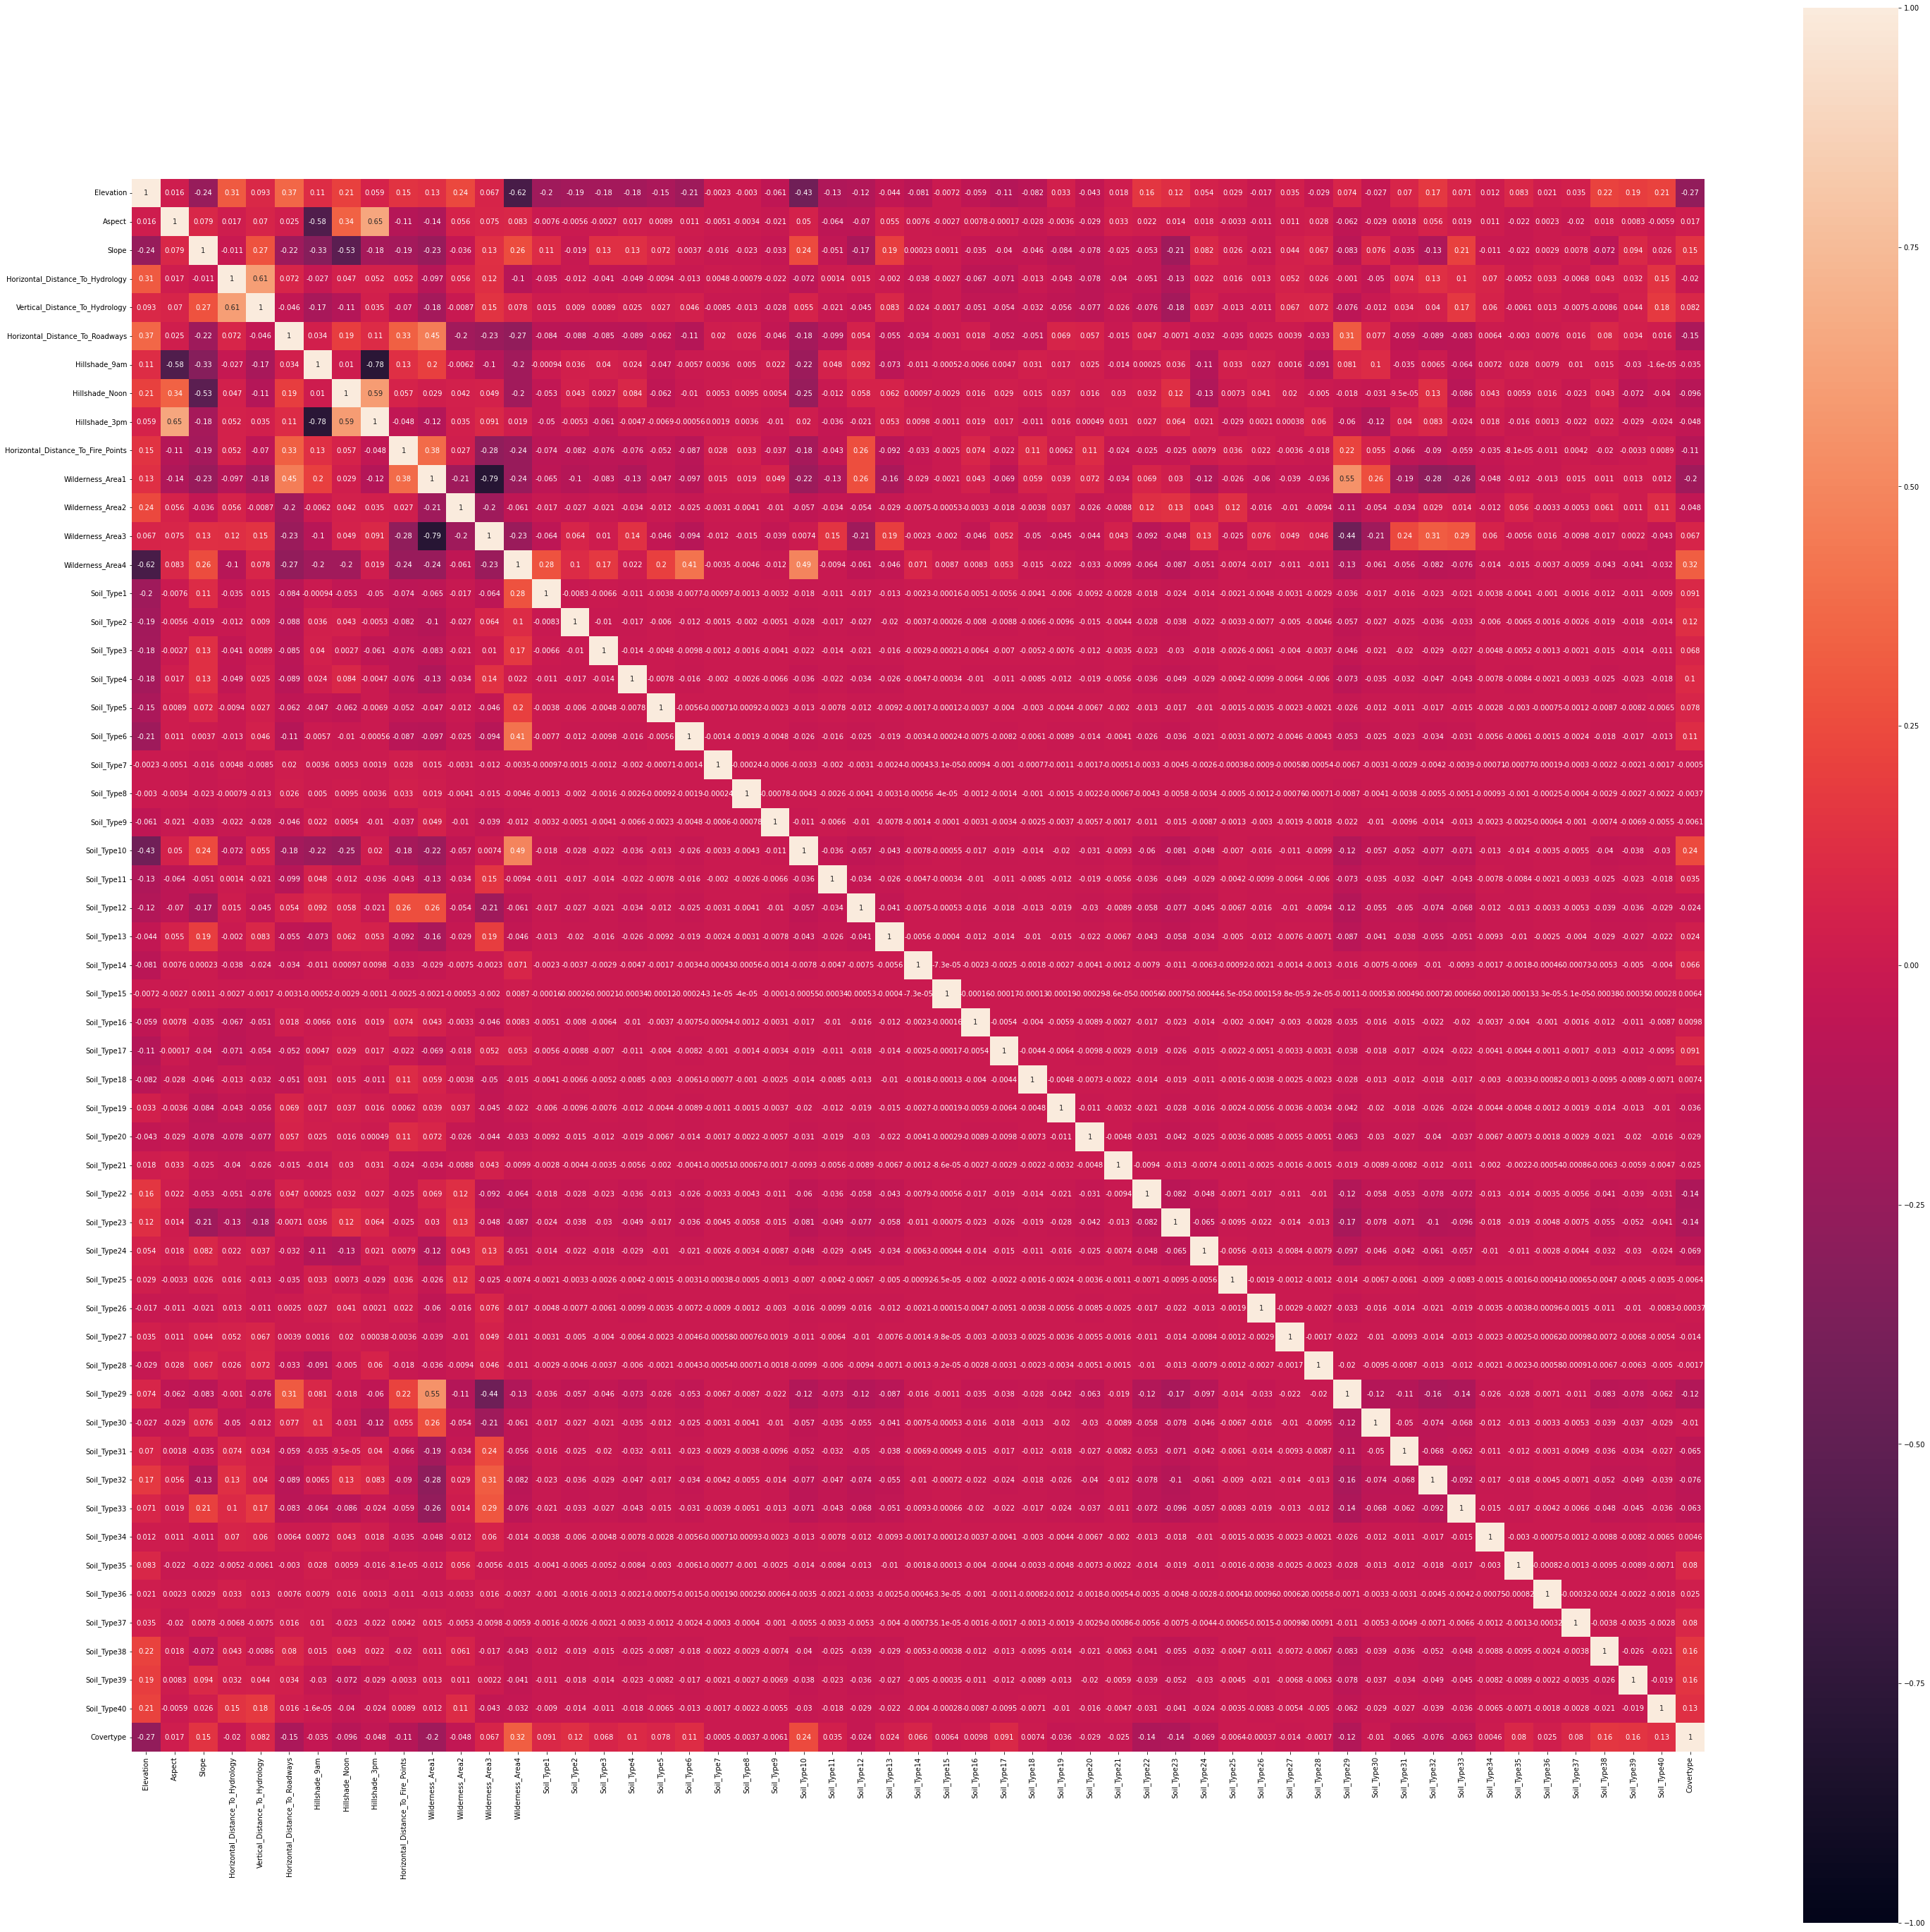

In [9]:
# displaying the correlation matrix 

matrix = pd.get_dummies(data)

plt.figure(figsize=(50, 50))
corrMatrix = matrix.corr()
sns.heatmap(corrMatrix, vmin=-1, vmax=1, square=True, annot=True)
plt.show()

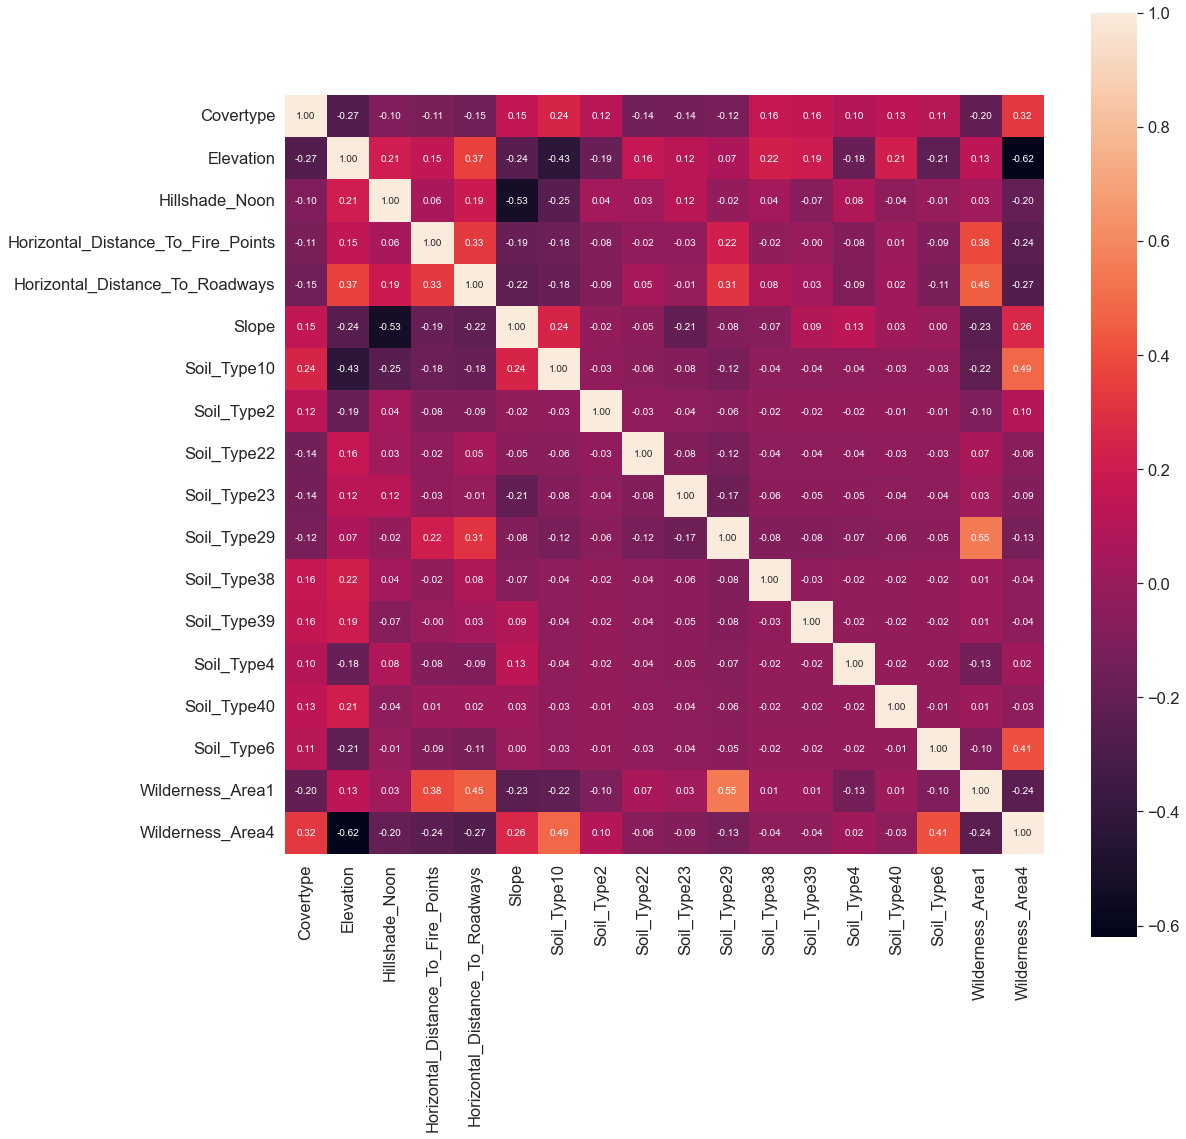

In [10]:
# correlation matrix of 'k' higly correlated features (correlated with 'Covertype')
# I chose all the featuers above absolute value of 0.1

plt.figure(figsize=(17, 17))
k_high = 10 # number of variables for heatmap - high
k_low = 8 # number of variables for heatmap - low
largest = corrMatrix.nlargest(k_high, 'Covertype')['Covertype']
smallest = corrMatrix.nsmallest(k_low, 'Covertype')['Covertype']
abs_high = largest + smallest
cols = abs_high.index
cm = np.corrcoef(matrix[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<h2>I tried to use the suggested 'Sequential Feature Selection' method but I ran it for almost an hour but even after so long it did not finish the calculation.<br>

So, I ended up using the correlation martix to filter out irrelevant features just like i did in the first assignment.</h2>



In [11]:
# creating sorted data with th relevant features from the heatmap above

sorted_data = data.filter(cols)

<h1>Model Development</h1>

In [12]:
# deviding the data into labels and features in order to split the data properly

features = sorted_data.drop(['Covertype'] , axis = 1) # labels only ('Covertype')

labels = sorted_data['Covertype']

In [13]:
# splitting the data into train, validation and test (70:15:15)

# splitting sorted data to train 85% and test 15% :
train_temp_labels, test_labels, train_temp_features, test_features = train_test_split(labels, features, test_size=0.15) 

# splitting train data output to new train data containing 70% of total data and 15% validation data:
train_labels, val_labels, train_features, val_features = train_test_split(train_temp_labels, train_temp_features, test_size=0.176) 

In [16]:
# a table to contain all the results for model training, validation and test for later comparison

scores = pd.DataFrame(columns=['Train Accuracy','Validation Accuracy','Test Accuracy'],index=['Forest', 'Forest_SFS', 'XGBoost', 'XGBoost_SFS'])

# Random Forest

In [17]:
# hyperparameter search using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 9, 13, 17, 21, 25],
    'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [20, 50, 100, 400]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)


## this takes a lot of time to compute so its been commented:


In [18]:
# Fit the grid search to the data

#grid_search.fit(train_features, train_labels)
#grid_search.best_params_

<AxesSubplot:>

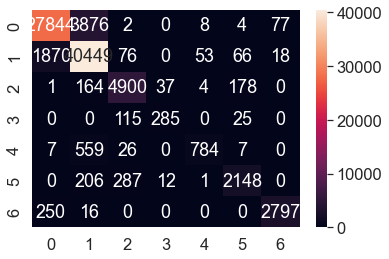

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


forest = RandomForestClassifier(criterion='entropy', n_estimators=20, max_depth=21, max_features=6, min_samples_leaf=2, min_samples_split=8, bootstrap=True, n_jobs=6)
forest.fit(train_features, train_labels)

test_pred_labels = forest.predict(test_features)
test_predictions = [round(value) for value in test_pred_labels]

conf = confusion_matrix(test_labels, test_predictions)
sns.heatmap(conf, annot=True, fmt="d")

In [20]:
# adding the results to the table

scores.at['Forest','Train Accuracy'] = forest.score(train_features, train_labels)
scores.at['Forest','Validation Accuracy'] = forest.score(val_features, val_labels)
scores.at['Forest','Test Accuracy'] = forest.score(test_features, test_labels)

# XGBoost

<AxesSubplot:>

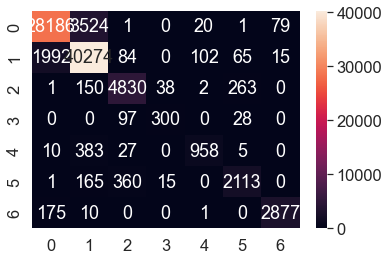

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

XGB = XGBClassifier(eval_metric='merror', n_estimators=100, learning_rate=0.25, max_depth=11, min_child_weight=1, gamma=0, colsample_bytree=0.7, tree_method='gpu_hist', gpu_id=0, n_jobs=4)

XGB.fit(train_features, train_labels)

test_pred_labels = XGB.predict(test_features)
test_predictions = [round(value) for value in test_pred_labels]

conf = confusion_matrix(test_labels, test_predictions)
sns.heatmap(conf, annot=True, fmt="d")

In [22]:
# adding the results to the table

scores.at['XGBoost','Train Accuracy'] = XGB.score(train_features, train_labels)
scores.at['XGBoost','Validation Accuracy'] = XGB.score(val_features, val_labels)
scores.at['XGBoost','Test Accuracy'] = XGB.score(test_features, test_labels)

In [23]:
scores

Train Accuracy Validation Accuracy Test Accuracy
Forest        0.943901            0.909077      0.908837
XGBoost       0.951472            0.908629      0.909377

In [24]:
import torch 

print('torch.cuda.is_available():', torch.cuda.is_available())

print('torch.cuda.current_device():', torch.cuda.current_device())

torch.cuda.is_available(): True
torch.cuda.current_device(): 0


# TabNet

In [32]:
from pytorch_tabnet.tab_model import TabNetClassifier

X_train = train_features.to_numpy()
y_train = train_labels.to_numpy()
X_valid = val_features.to_numpy()
y_valid = val_labels.to_numpy()
X_test = test_features.to_numpy()
y_test = test_labels.to_numpy() 

clf = TabNetClassifier(device_name='cuda:0')

clf.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],
    eval_name=['validation'],
    eval_metric=['accuracy'],
    max_epochs=200, patience=20
    )

preds = clf.predict(X_test)

Device used : cuda:0
epoch 0  | loss: 0.73243 | validation_accuracy: 0.7131  |  0:00:14s
epoch 1  | loss: 0.64258 | validation_accuracy: 0.73917 |  0:00:28s


For this method I could'nt get a better score than 84% accuracy.
I am not sure I was using everything as intended but I think the results for Random Forest and XGBoost were better.

# Conclution

